In [12]:
import numpy as np, tensorflow as tf
from glob import glob
from analysis import plot_deep_features

In [13]:
import os
import h5py
from pprint import pprint
from tqdm import tqdm
from IPython import display
%matplotlib inline

In [44]:
%%sh
cd data/
ls -l

total 2517336
-rw-rw-r-- 1 ubuntu ubuntu 809230648 Oct  9 21:20 lambda_scale_experiment.h5
-rw-rw-r-- 1 ubuntu ubuntu 553198613 Oct  9 17:55 large_lambda_1.0.h5
-rw-rw-r-- 1 ubuntu ubuntu 809230648 Oct  9 17:45 long_centroid_test.h5
-rw-rw-r-- 1 ubuntu ubuntu  58409876 Oct  9 04:48 training_lambda_test_2.h5
-rw-rw-r-- 1 ubuntu ubuntu       342 Oct  9 04:19 training_lambda_test.h5
-rw-rw-r-- 1 ubuntu ubuntu 116034608 Oct  9 03:29 training_no_centroid.h5
-rw-rw-r-- 1 ubuntu ubuntu 114882844 Oct  9 17:45 training_test_2.h5
-rw-rw-r-- 1 ubuntu ubuntu  39150056 Oct  9 08:42 training_test_3.h5
-rw-rw-r-- 1 ubuntu ubuntu  77570096 Oct  9 05:05 training_test.h5


In [42]:
%%sh
# mkdir data
# rm data/training_test_3.h5
pwd
cp dumps/training_test.h5 data/lambda_scale_experiment.h5
# h5clear data/training_test_2.h5
cd data/
ls -l | grep *.h5

/home/ubuntu/deep_learning_notes/Proj_Centroid_Loss_LeNet/LeNet_plus_centerloss


In [47]:
filepath = 'data/lambda_scale_experiment.h5'     

In [52]:
with h5py.File(filepath, 'r', libver='latest', swmr=True) as f:
    print(len(f.keys()))
    print(sorted(f.keys())[-1])

1261
step_063000


In [50]:
%%sh
cd figures/animation
# rm -rf lambda_test
mkdir lambda_scale_experiment

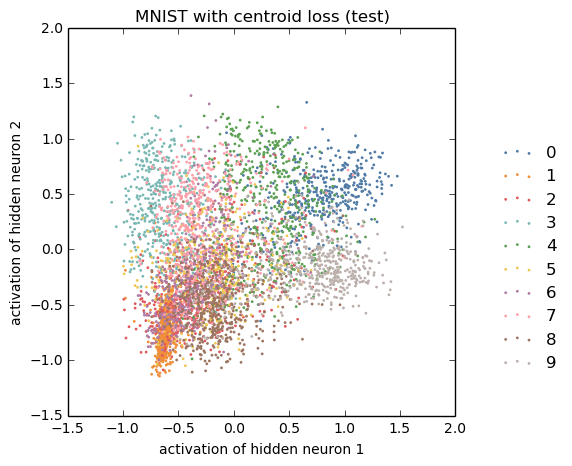

  1%|          | 8/1260 [00:23<1:00:32,  2.90s/it]

In [ ]:
with h5py.File(filepath, 'r', libver='latest', swmr=True) as f:
    for i, step_key in enumerate(tqdm(sorted(f.keys())[:-1:1])):
        
        step_entry = f[step_key]
        
        if len(step_entry.keys()) == 0:
            print('entry is empty')

        else:

            deep_features = step_entry['deep_features']
            logits = step_entry['logits']
            target_labels = step_entry['target_labels']

            target_labels_output = list(target_labels)

            # plt.cla()
            display.clear_output(wait=True)
            plot_deep_features(
                deep_features, 
                target_labels, 
                title="MNIST with centroid loss (test)",
                #xlim=(-10, 10), 
                #ylim=(-10, 10),
                save=False, 
                frame_prefix='lambda_scale_experiment/frame',
                frame_index=int(i)
            )

In [36]:
%%sh
cd figures/animation/
ls | grep centroid

long_centroid_test
MNIST_LeNet_centroid_loss_01_faster.mp4
MNIST_LeNet_centroid_weak_test.mp4
MNIST_LeNet_long_centroid_test.mp4


In [38]:
%%sh
cd figures/animation/
rm MNIST_LeNet_long_centroid_test.mp4

In [39]:
%%sh
cd figures/animation/long_centroid_test/
ffmpeg -framerate 10 -i frame_%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ../MNIST_LeNet_long_centroid_test.mp4

ffmpeg version N-80901-gfebc862 Copyright (c) 2000-2016 the FFmpeg developers
  built with gcc 4.8 (Ubuntu 4.8.4-2ubuntu1~14.04.3)
  configuration: --extra-libs=-ldl --prefix=/opt/ffmpeg --mandir=/usr/share/man --enable-avresample --disable-debug --enable-nonfree --enable-gpl --enable-version3 --enable-libopencore-amrnb --enable-libopencore-amrwb --disable-decoder=amrnb --disable-decoder=amrwb --enable-libpulse --enable-libfreetype --enable-gnutls --enable-libx264 --enable-libx265 --enable-libfdk-aac --enable-libvorbis --enable-libmp3lame --enable-libopus --enable-libvpx --enable-libspeex --enable-libass --enable-avisynth --enable-libsoxr --enable-libxvid --enable-libvidstab
  libavutil      55. 28.100 / 55. 28.100
  libavcodec     57. 48.101 / 57. 48.101
  libavformat    57. 41.100 / 57. 41.100
  libavdevice    57.  0.102 / 57.  0.102
  libavfilter     6. 47.100 /  6. 47.100
  libavresample   3.  0.  0 /  3.  0.  0
  libswscale      4.  1.100 /  4.  1.100
  libswresample   2.  1.100 /